# Q1
Let f(x,y) = −log(1−x−y)−logx−logy with domain D = {(x,y) : x+y < 1, x > 0, y > 0}

Find global minima using Gradient descent

In [199]:
import numpy as np

#init a 2d vector for initial coordinates
X = [50,50]
while X[1] + X[0] >= 1:
    X = np.around( (1 - (0.001)) * np.random.random_sample((2)) +.001 ,3)

In [200]:
print('initial X0 = ', X)
print(X[0] + X[1])

('initial X0 = ', array([ 0.131,  0.587]))
0.718


## Find the global minima using gradient descent

In [201]:
#Contains the Gradient function returning a 2d array
def mGrad(x, y):
    return np.array([1/(1-x-y) - 1/x, 1/(1-x-y) - 1/y])

def func(x,y):
    return -np.log(1-x-y) - np.log(x) - np.log(y)

In [219]:
#basically we need this update: xn+1 = xn - r*gradient where 0 < a < 1
Xnew = np.copy(X)
n = 0
r = .047125 # this controls the rate that we update at...divided by two to recieve best results (minimum iterations)
mPLOT = []
energyPLOT = []
energyPLOT.append([0,func(Xnew[0], Xnew[1])])
mPLOT.append([Xnew[0], Xnew[1]])

while n < 1000:
    G = mGrad(Xnew[0],Xnew[1])
    Xnew = Xnew - r*G
    mPLOT.append([Xnew[0], Xnew[1]])
    
    if( Xnew[0] + Xnew[1] >= 1 or Xnew[0] <= 0 or Xnew[1] <= 0 ):
        print("COORDINATE LIMITS BREACHED - Diverges!! X = ", Xnew[0], "; Y= ", Xnew[1])
        break
    n += 1
    energyPLOT.append([n, func(Xnew[0], Xnew[1])])
    energyChangeX = abs(energyPLOT[n][1] - energyPLOT[(n-1)][1])
    if(  energyChangeX <= 10**(-5)):
        print("reached convergence. Total iterations: ", n)
        break
    
    
mPLOT = np.array(mPLOT)
energyPLOT = np.array(energyPLOT)

('reached convergence. Total iterations: ', 9)


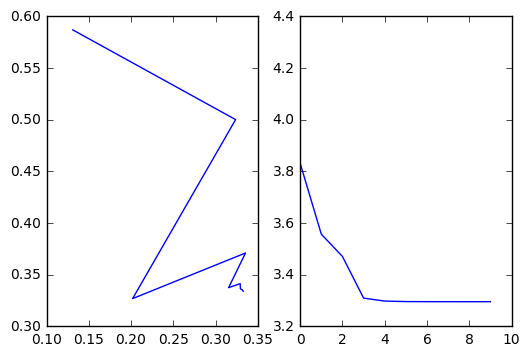

In [220]:
#PLOT SETUP 
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
fig, ax = plt.subplots()
plt.xlabel("X value")
plt.ylabel("Y value")
plt.axis([0, 1, 0,1])
plt.grid(b=True, which='both', axis='both')
plt.subplot(121)
plt.plot(mPLOT[:,0],mPLOT[:,1], label='position trend')
ax.legend(loc='best', shadow=True, fancybox=True, numpoints=1)
plt.subplot(122)
plt.axis([0, 10, 3.2,4.4])
plt.plot(energyPLOT[:,0],energyPLOT[:,1], label='position trend')
plt.show()

## Find global Minima using Newtons Method

In [221]:
def mHessian(x, y):
    H = np.array([[1/(1-x-y)**2 + 1/x**2 , 1/(1-x-y)**2], [1/(1-x-y)**2 , 1/(1-x-y)**2 + 1/y**2]])
    #print(H)
    return H

def InverseHessian(x,y):
    H = mHessian(x,y)
    Hinverse = np.linalg.inv(H)
    #print("inverse H = ", Hinverse)
    return Hinverse

In [244]:
#xn+1 = xn - (r-r^2/2)*gradient*Hinverse*gradient where 0 < r < 1
Xnew = np.copy(X) #copying to ensure both algorithms start at the same point for better comparison
n = 0
r = .047125 # this controls the rate that we update at...divided by two to recieve best results (minimum iterations)
mPLOT = []
energyPLOT = []
energyPLOT.append([0,func(Xnew[0], Xnew[1])])
mPLOT.append([Xnew[0], Xnew[1]])

while n < 1000:
    G = mGrad(Xnew[0],Xnew[1])
    HinverseG = InverseHessian(Xnew[0],Xnew[1]).dot(G)
    #GHinverseG = G*HinverseG #This seemed to not make it work... H^-1G makes more sense to me
    #print("inverse H * G = ", HinverseG)
    #print("g * inverse H * G = ",GHinverseG )
    Xnew = Xnew - (r)*HinverseG
    mPLOT.append([Xnew[0], Xnew[1]])
    #print("Xnew = ", Xnew)
    
    if( Xnew[0] + Xnew[1] >= 1 or Xnew[0] <= 0 or Xnew[1] <= 0 ):
        print("COORDINATE LIMITS BREACHED - Diverges!! X = ", Xnew[0], "; Y= ", Xnew[1])
        break
    n += 1
    energyPLOT.append([n, func(Xnew[0], Xnew[1])])
    energyChangeX = abs(energyPLOT[n][1] - energyPLOT[(n-1)][1])
    if(  energyChangeX <= 10**(-5)):
        print("reached convergence. Total iterations: ", n)
        break
    
mPLOT = np.array(mPLOT)
energyPLOT = np.array(energyPLOT)
print("x = ", Xnew[0], " Y = ", Xnew[1])
print("total iterations: ", n)

('reached convergence. Total iterations: ', 97)
('x = ', 0.3297885302849437, ' Y = ', 0.33604787293890781)
('total iterations: ', 97)


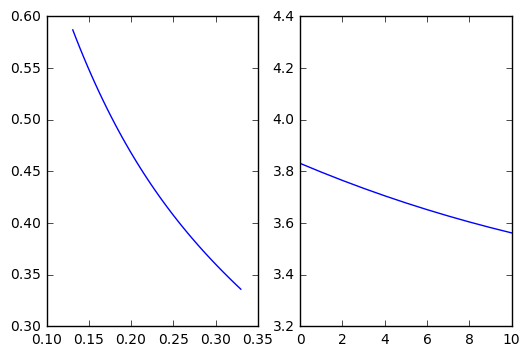

In [242]:
#PLOT SETUP 
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
fig, ax = plt.subplots()
plt.xlabel("X value")
plt.ylabel("Y value")
plt.axis([0, 1, 0,1])
plt.grid(b=True, which='both', axis='both')
plt.subplot(121)
plt.plot(mPLOT[:,0],mPLOT[:,1], label='position trend')
ax.legend(loc='best', shadow=True, fancybox=True, numpoints=1)
plt.subplot(122)
plt.axis([0, 10, 3.2,4.4])
plt.plot(energyPLOT[:,0],energyPLOT[:,1], label='position trend')
plt.show()

## Compare the speed of convergence of gradient descent and Newton’s method, i.e. how fast does each method approach the estimated global minimum?
#### Gradient Descent: converges in 9 iterations, while Newtons method using the same ratio 'r' converges in 97 iterations. However, the ratio 'r' can be increased to 1 for Newtons Method and can make it converge in 5 iterations. The 'r' in newtons method serves as a damper.

# Q2

In [351]:
#Let xi = i, i = 1,...,50. ... We will make each as [1 xi]
x = [[0] * 2 for i in range(50)]
i = 0
while i < 50:
    x[i] = [1 , i+1]
    i += 1
x = np.array(x)

i = 0
y = np.arange(1, 51, 1.0) 
while i < 50:
    ui = (1 - (-1)) * np.random.random_sample() -1
    update = (i+1) + randomNum
    y[i] = update
    i += 1
y = np.array(y)
print(y)
print(x.shape)


[  1.72811796   2.04207151   2.4844908    3.92756207   4.6015375
   5.19258231   6.13316995   8.4696316    9.74231627  10.79442559
  10.12806747  12.00772272  12.89295113  13.5607178   15.21580878
  15.13706473  17.55633922  18.86646717  18.78736277  19.83460814
  21.48845639  21.61292241  23.54999227  24.98138574  25.78184036
  25.20535095  26.40189853  27.22841175  29.54449341  30.1607792
  31.57941025  32.18819992  32.30099461  34.9226334   35.56911035
  35.4755523   36.32049523  37.17958756  38.27021958  39.52702334
  40.05608223  41.21496385  43.81651044  44.68236119  44.04453242
  46.08341505  47.63510943  48.53386922  49.15120769  49.60605969]
(50, 2)


## Find the linear least squares fit using the pseudo inverse

In [361]:
Xpinv = np.linalg.pinv(x)
Xpinv = Xpinv.T
print("X pseudo inverse shape with transpose: ", Xpinv.shape)

y = y.T
print("y shape: ", y.shape)

W = y.dot(Xpinv)
print("W has shape: ", W.shape, W )

D = W.dot(x.T)
print("y with Wfrminv has shape: ", D.shape  )

('X pseudo inverse shape with transpose: ', (50, 2))
('y shape: ', (50,))
('W has shape: ', (2,), array([-0.00348654,  0.99873742]))
('y with Wfrminv has shape: ', (50,))


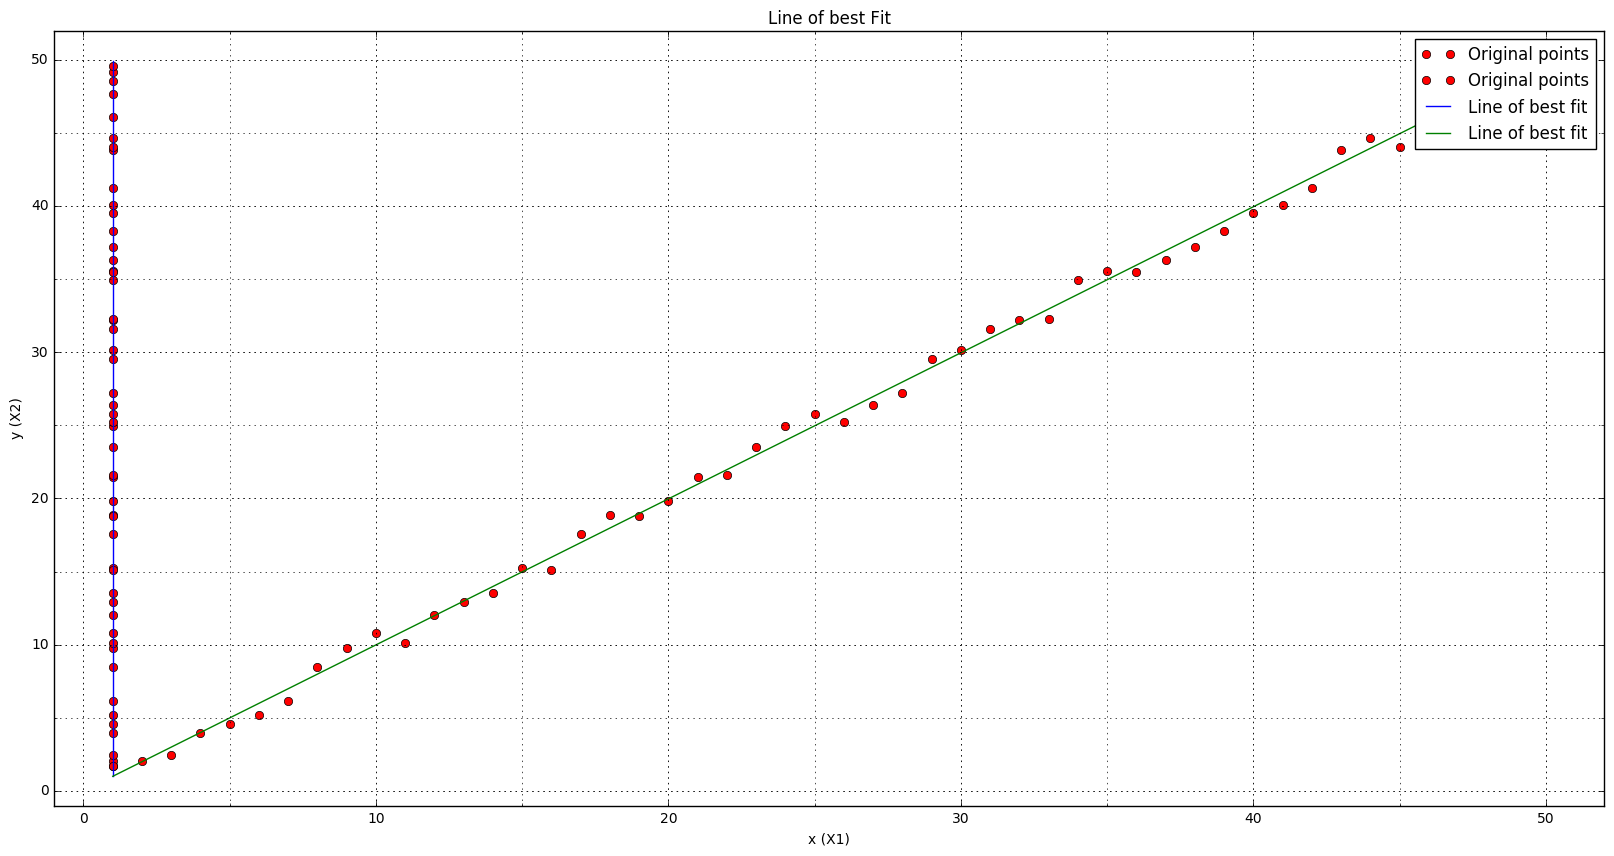

In [380]:
#PLOT SETUP
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)

plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots()

plt.xlabel("x (X1)")
plt.ylabel("y (X2)")
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(5))
plt.axis([-1, 52, -1, 52])
plt.grid(b=True, which='both', axis='both')

ogLine = plt.plot(x,y, 'ro',label='Original points')
bestFitLine = plt.plot(x, D, label='Line of best fit')
plt.title('Line of best Fit')

ax.legend()
# plt.show()

## Find the linear least squares fit using the gradient descent algorithm. Compare with (c).

In [414]:
#Contains the Gradient function returning a 2d array
def mGrad2(x, y, w):
    tmp = [0,0]
    print("x shape = ", x.shape, " y shape = ", y.shape, " tmp[1] = ", tmp[1])
    for i in range(50):
        tmp[0] += -2*(y[i] - (w[0] + w[1]*x[i]))
        tmp[1] += -2*(y[i] - (w[0] + w[1]*x[i]))*x[i]
    print("tmp gradient = ", tmp)
    return np.array(tmp)

def func2(x,y, w): #returns summation( (yi - (w0 + w1xi))^2  )
    tmp = 0
    for i in range(50):
        tmp += (y[i] - (w[0] + w[1]*x[i]))**2
    return tmp

In [415]:
#basically we need this update: w = w - r*g*E 
Wnew = np.copy(W)
print("W original = ", Wnew)
n = 0
r = .5 # this controls the rate that we update at...divided by two to recieve best results (minimum iterations)
mPLOT = []
energyPLOT = []
energyPLOT.append([0,func2(x,y, Wnew)])
mPLOT.append([x,y])
E = 0

while n < 1:
    G = mGrad2(x,y, Wnew)
    E = func2(x,y, Wnew)
    print("G*E = ", G*E)
    Wnew = Wnew - r*G*E
    
    mPLOT.append([Wnew[0], Wnew[1]])
    
#     if( Xnew[0] + Xnew[1] >= 1 or Xnew[0] <= 0 or Xnew[1] <= 0 ):
#         print("COORDINATE LIMITS BREACHED - Diverges!! X = ", Xnew[0], "; Y= ", Xnew[1])
#         break
    n += 1
#     energyPLOT.append([n, func(Xnew[0], Xnew[1])])
#     energyChangeX = abs(energyPLOT[n][1] - energyPLOT[(n-1)][1])
#     if(  energyChangeX <= 10**(-5)):
#         print("reached convergence. Total iterations: ", n)
#         break
    
print("Wnew = ", Wnew)
mPLOT = np.array(mPLOT)
# energyPLOT = np.array(energyPLOT)

('W original = ', array([-0.00348654,  0.99873742]))
('x shape = ', (50, 2), ' y shape = ', (50,), ' tmp[1] = ', 0)
('tmp gradient = ', [array([ -2.44690668e+03,   9.68114477e-13]), array([ -2.44690668e+03,   3.59534624e-11])])
('G*E = ', array([[ -9.87139908e+07,   1.87575543e-11],
       [ -9.87139908e+07,   6.96610823e-10]]))
('Wnew = ', array([[  4.93569954e+07,   9.98737420e-01],
       [  4.93569954e+07,   9.98737420e-01]]))


In [ ]:
#PLOT SETUP 
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
fig, ax = plt.subplots()
plt.xlabel("X value")
plt.ylabel("Y value")
plt.axis([0, 1, 0,1])
plt.grid(b=True, which='both', axis='both')
plt.subplot(121)
plt.plot(mPLOT[:,0],mPLOT[:,1], label='position trend')
ax.legend(loc='best', shadow=True, fancybox=True, numpoints=1)
plt.subplot(122)
plt.axis([0, 10, 3.2,4.4])
plt.plot(energyPLOT[:,0],energyPLOT[:,1], label='position trend')
plt.show()

In [48]:
#setting up graph to plot in 3d
x = []
i = .01
while i < 1:
    j = .01
    while j < 1:
        if (i + j < 1):
            x.append([i,j])
        j += .01
    i +=.01
x = np.array(x)
print (x)

X_vect = np.array(x[:,0])
Y_vect = np.array(x[:,1])

[[ 0.01  0.01]
 [ 0.01  0.02]
 [ 0.01  0.03]
 ..., 
 [ 0.97  0.01]
 [ 0.97  0.02]
 [ 0.98  0.01]]


In [52]:
print('[x,y]: ', x)
print('x vector- SHAPE: ', X_vect.shape, X_vect)
print('y vector- SHAPE: ', Y_vect.shape, Y_vect)


('[x,y]: ', array([[ 0.01,  0.01],
       [ 0.01,  0.02],
       [ 0.01,  0.03],
       ..., 
       [ 0.97,  0.01],
       [ 0.97,  0.02],
       [ 0.98,  0.01]]))
('x vector- SIZE: ', (4851,), array([ 0.01,  0.01,  0.01, ...,  0.97,  0.97,  0.98]))
('y vector- SIZE: ', (4851,), array([ 0.01,  0.02,  0.03, ...,  0.01,  0.02,  0.01]))


In [58]:
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X_vect = x[:,0]
Y_vect = x[:,1]
Z = func(X_vect, Y_vect)
print('z shape: ', Z.shape)
Z.reshape((len(X_vect), len(Y_vect)))


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X_vect, Y_vect, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

('z shape: ', (4851,))


ValueError: total size of new array must be unchanged